This analysis explores the characteristic of Spotify's most streamed songs. The dataset includes many variables such as the number of playlists and charts those songs appear on along with musical features like beats per minute (BPM), music key and mode, dancebility etc. By examining those factor my goal is to find trends and patterns that contribute to the streaming success of these songs.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#analising simple dataset on Spotify Most Streamed Songs
file = pd.read_csv('Spotify Most Streamed Songs.csv')
file.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


In [4]:
#deviding variables into categorical and numerical
music_categorical_var = ['track_name','artist(s)_name','artist_count','released_year','released_month','released_day','key','mode']
music_numerical_var = ['in_spotify_playlists','in_spotify_charts','streams','in_apple_playlists','in_apple_charts','in_deezer_playlists','in_deezer_charts','bpm','danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']
print("categorical variables: ")
print(music_categorical_var)
print("numerical variables: ")
print(music_numerical_var)


categorical variables: 
['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'key', 'mode']
numerical variables: 
['in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']


In [5]:
file[music_numerical_var].describe()
#Computing basic statistics
#We can observe a difference between platform popularity --> tracks on Spotify are generally present
#in more playlists than on Apple Music or Deezer.


,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


<Axes: >

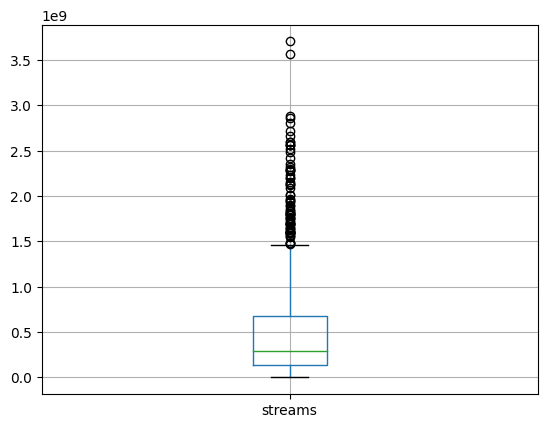

In [6]:
file['streams'] = pd.to_numeric(file['streams'], errors='coerce')
file.boxplot(['streams'])
#boxplot green line --> low median deviding dataset into 2 equal halves --> this indicates that
#there are many songs with avarage and low number of streams but only a few of them are viral hits


Text(0, 0.5, 'Streams')

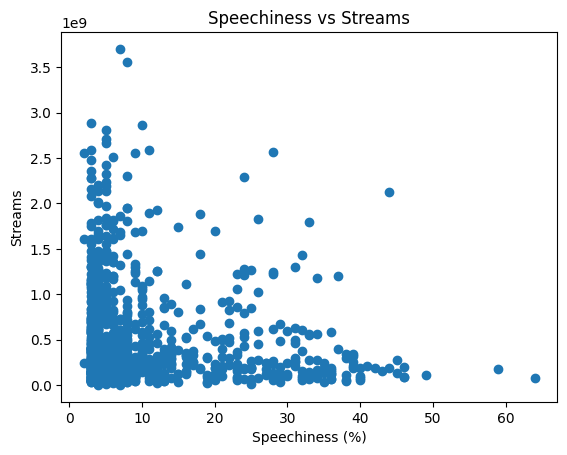

In [7]:
plt.scatter(file['speechiness_%'],file['streams'])
plt.title('Speechiness vs Streams')
plt.xlabel('Speechiness (%)')
plt.ylabel('Streams')

#This plot shows correlation between speechiness of songs and streams. We can easily observe that songs with less lyrics
#are more popular. Speechiness of the most streamed songs vary between few % to 40% with two viral hits 7/8% speechiness.



Text(0, 0.5, 'Streams')

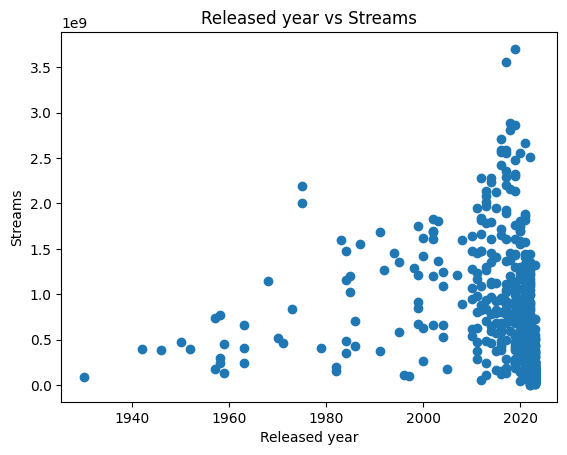

In [16]:
plt.scatter(file['released_year'],file['streams'])
plt.title('Released year vs Streams')
plt.xlabel('Released year')
plt.ylabel('Streams')
#This plot shows correlation between relesed year of songs and it's number of streams
#We can observe that in 2022 and 2023 songs tend to be more popular. However
#there are some timeless songs eg 1930 still getting sreamed. In general newer songs
#have better chance of becoming popular.

Text(0, 0.5, 'Streams')

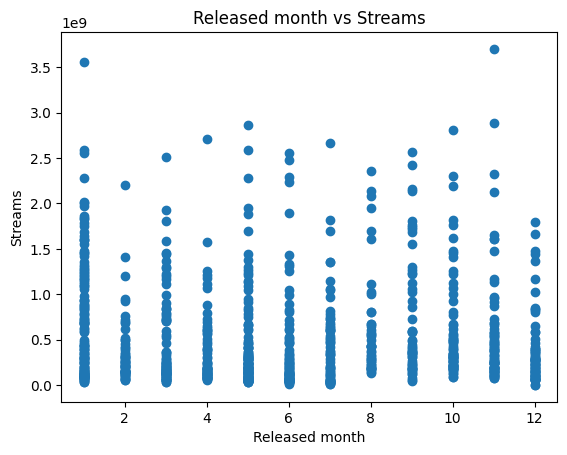

In [17]:
plt.scatter(file['released_month'],file['streams'])
plt.title('Released month vs Streams')
plt.xlabel('Released month')
plt.ylabel('Streams')
#There is no correlation between relese month and number of streams.



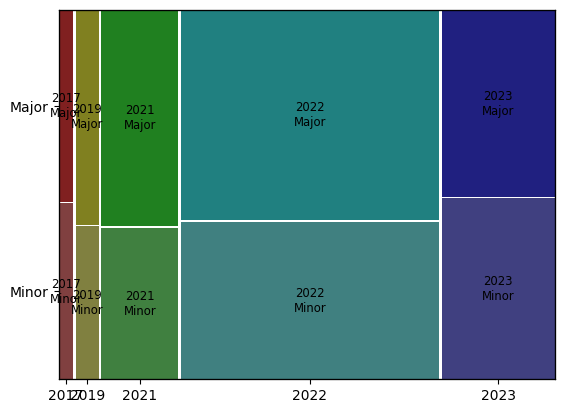

In [19]:
from statsmodels.graphics.mosaicplot import mosaic

filtered_file = file[file['released_year'].isin([2023, 2019, 2022, 2021, 2017])]
sort_values = filtered_file.sort_values(by='released_year')
mosaic(sort_values, ['released_year', 'mode'])
#Mosaic shows that in 2019,2021 and 2022 song with major mode were more popular. However in
# 2017 and 2023 major and minor songs were equally streamed.

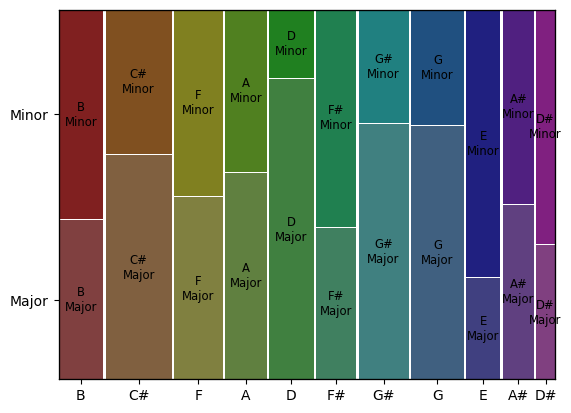

In [11]:
mosaic(file,['key','mode']);
#C# major is the most common key in popular songs, followed by G major and D major,
#while E and F are more frequent in minor mode, with A# and D# being less popular overall.


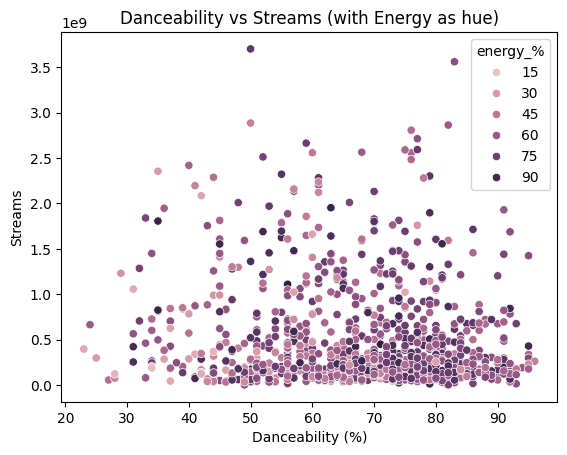

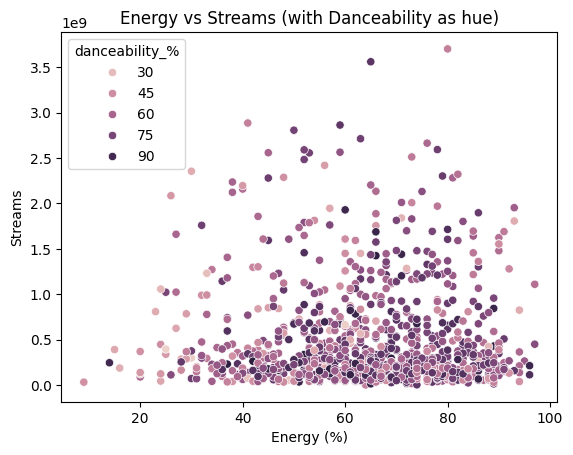

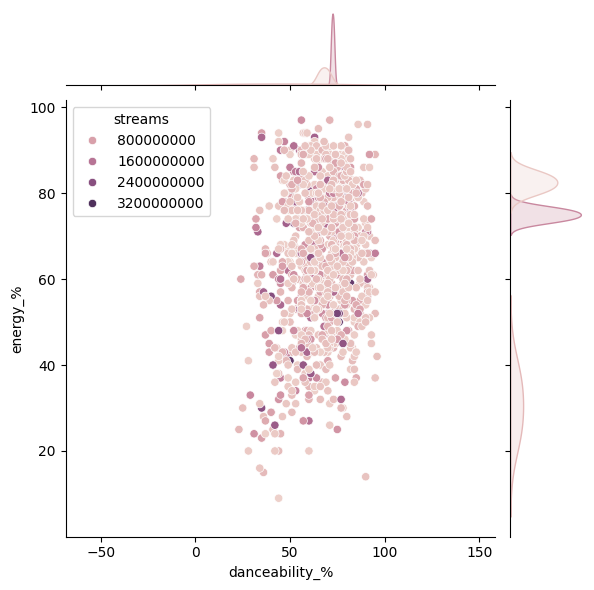

In [12]:
import seaborn as sns
sns.scatterplot(x='danceability_%', y='streams', data=file, hue='energy_%')
plt.title('Danceability vs Streams (with Energy as hue)')
plt.xlabel('Danceability (%)')
plt.ylabel('Streams')
plt.show()
sns.scatterplot(x='energy_%', y='streams', data=file, hue='danceability_%')
plt.title('Energy vs Streams (with Danceability as hue)')
plt.xlabel('Energy (%)')
plt.ylabel('Streams')
plt.show()
sns.jointplot(x='danceability_%', y='energy_%', data=file, kind='scatter', hue='streams')
plt.show()
#These three graphs show the relationship between energy, danceability, and streams in a set of songs
#where most songs have medium energy (between 40% to 80%) and danceablity (between 60% to 70%) but the number of streams varies a lot.
#The violin plot shows that most songs have average energy levels

<ipython-input-21-1c3b57b99994>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='track_count', y='artist(s)_name', data=artist_stats.head(10), palette='viridis')


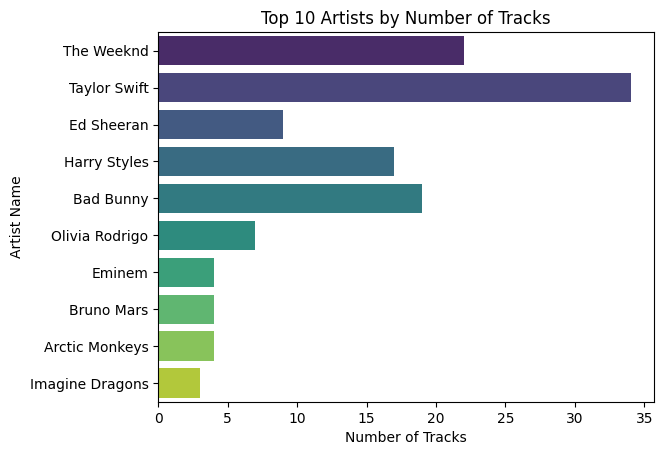

<ipython-input-21-1c3b57b99994>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_streams', y='artist(s)_name', data=artist_stats.head(10), palette='coolwarm')


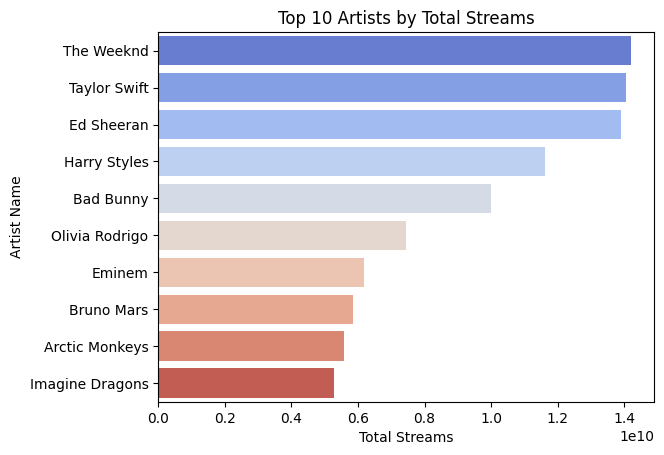

In [21]:
artist_stats = file.groupby('artist(s)_name').agg({
    'track_name': 'count',
    'streams': 'sum'
}).reset_index()

artist_stats.rename(columns={'track_name': 'track_count', 'streams': 'total_streams'}, inplace=True)
artist_stats = artist_stats.sort_values(by='total_streams', ascending=False)

sns.barplot(x='track_count', y='artist(s)_name', data=artist_stats.head(10), palette='viridis')
plt.title('Top 10 Artists by Number of Tracks')
plt.xlabel('Number of Tracks')
plt.ylabel('Artist Name')
plt.show()

sns.barplot(x='total_streams', y='artist(s)_name', data=artist_stats.head(10), palette='coolwarm')
plt.title('Top 10 Artists by Total Streams')
plt.xlabel('Total Streams')
plt.ylabel('Artist Name')
plt.show()

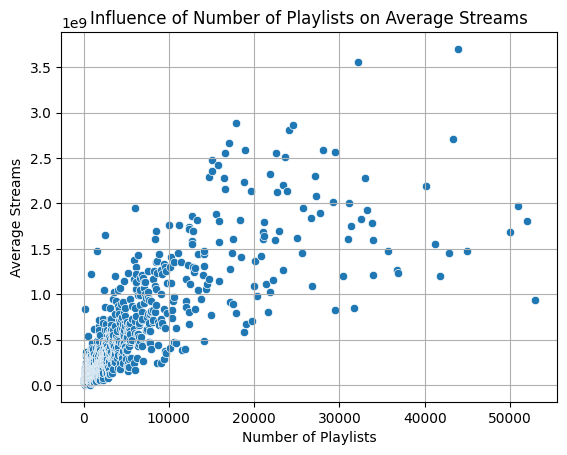

In [24]:
playlist_stats = file.groupby('in_spotify_playlists').agg({
    'streams': 'mean'
}).reset_index()

sns.scatterplot(x='in_spotify_playlists', y='streams', data=playlist_stats)
plt.title('Influence of Number of Playlists on Average Streams')
plt.xlabel('Number of Playlists')
plt.ylabel('Average Streams')
plt.grid()
plt.show()
#there is positive linear correlation between number of playlists songs are in and number of streams. We can observe that
#when songs are in many playlist people stream them more often. There are some exceptions when songs are not that popular
#but are in record amount of playlists.